In [1]:
import matplotlib.pyplot as plot
import numpy as np
import odespy

%matplotlib inline

In [2]:
from pyclouds import cloud_microphysics, parameterisations
from pyclouds.common import Var
from pyclouds.plotting import plot_hydrometeor_evolution

from unified_microphysics.tests.test_common import um_constants

/home/zmaw/m300464/pytools/pyclouds/cloud_microphysics.py:221: UserWarning: EoS calculation stored within microphysics, should really use something defined externally
  warnings.warn("EoS calculation stored within microphysics, should really use something defined externally")
/home/zmaw/m300464/pytools/pyclouds/cloud_microphysics.py:320: RuntimeWarning: divide by zero encountered in double_scalars
  lambda_r = (pi*(qg*rho_l)/(qr*rho_g)*N0r)**(1./4.)
/home/zmaw/m300464/pytools/pyclouds/parameterisations.py:170: UserWarning: Using default value for a1_ice
  warnings.warn("Using default value for %s" % c_name)
/home/zmaw/m300464/pytools/pyclouds/parameterisations.py:170: UserWarning: Using default value for a0_ice
  warnings.warn("Using default value for %s" % c_name)
/home/zmaw/m300464/pytools/pyclouds/parameterisations.py:170: UserWarning: Using default value for b_K
  warnings.warn("Using default value for %s" % c_name)
/home/zmaw/m300464/pytools/pyclouds/parameterisations.py:170: User

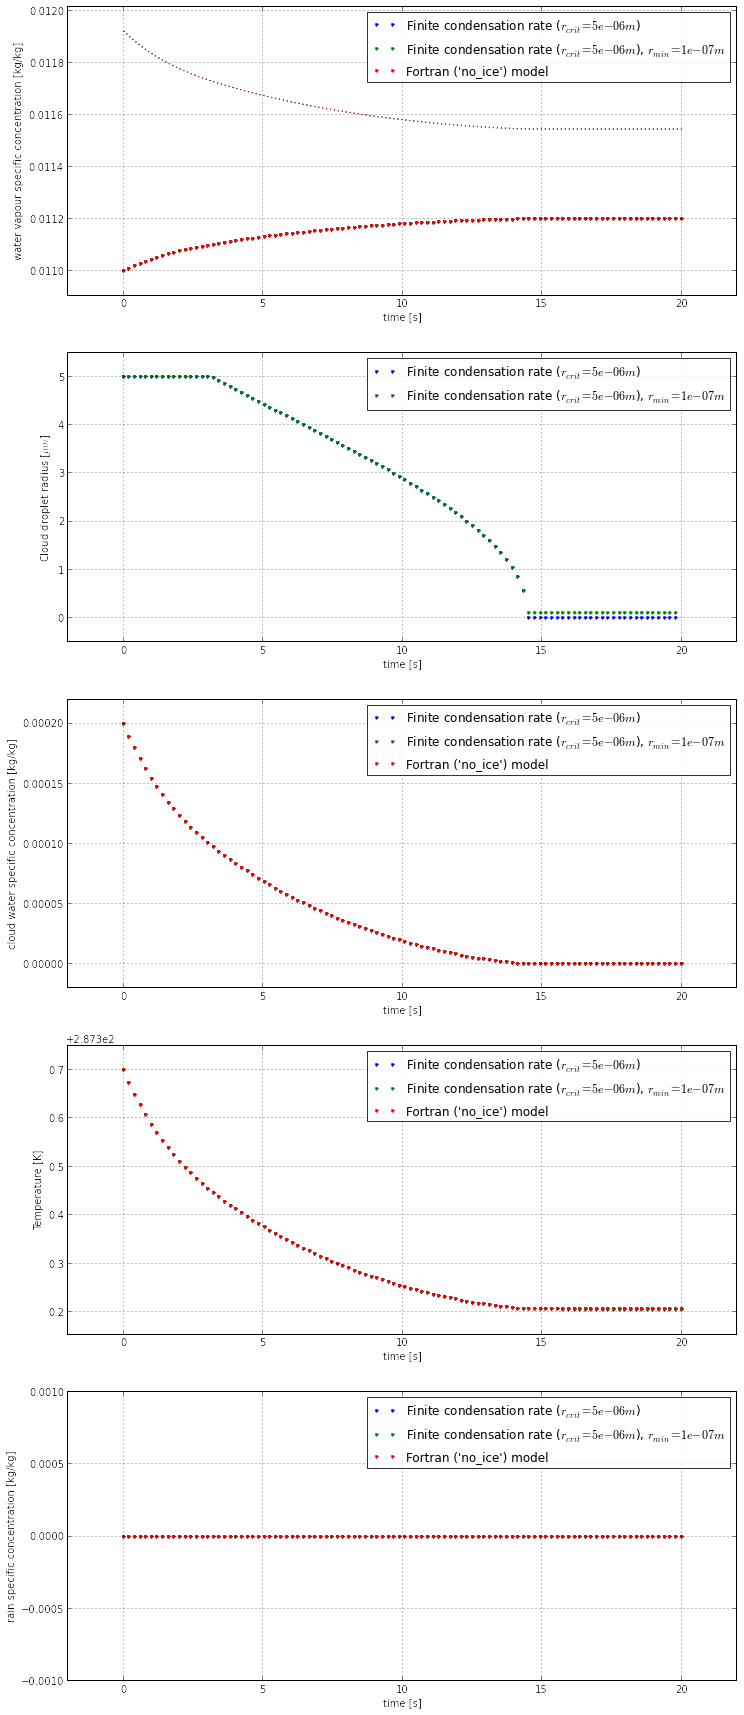

In [3]:
initial_condition = np.zeros((Var.NUM))
initial_condition[Var.q_v] = 1.1e-2
initial_condition[Var.q_l] = 2.0e-4

initial_condition[Var.T] = 288.
p0 = 88676.  # [Pa]

t_ = np.linspace(0., 20., 100)

SolverClass = odespy.Euler

solutions = []
#solutions.append(cloud_microphysics.FiniteCondensationTimeMicrophysics(r_crit=6e-6, constants=um_constants).integrate(initial_condition=initial_condition, t=t_, p0=p0, SolverClass=SolverClass))
solutions.append(cloud_microphysics.FiniteCondensationTimeMicrophysics(constants=um_constants).integrate(initial_condition=initial_condition, t=t_, p0=p0, SolverClass=SolverClass))
solutions.append(cloud_microphysics.FC_min_radius(constants=um_constants).integrate(initial_condition=initial_condition, t=t_, p0=p0, SolverClass=SolverClass))

solutions.append(cloud_microphysics.FortranNoIceMicrophysics().integrate(initial_condition=initial_condition, t=t_, p0=p0, SolverClass=SolverClass))

#sol2.plot()
plot = plot_hydrometeor_evolution(solutions, variables=['q_v', 'r_c', 'q_l', 'T', 'q_r'], legend_loc='upper right')

In [4]:
solution = solutions[0]
Var.print_formatted(solution.F[-1])

r=0,	w=0,	T=287.507,	q_v=0.0112001,	q_r=0,	q_l=0,	q_i=0


In [5]:
model = cloud_microphysics.FiniteCondensationTimeMicrophysics(constants=um_constants)
Var.print_formatted(model.dFdt(F=initial_condition, p=p0, t=0.0))

r=0,	w=0,	T=-0.131552,	q_v=5.33786e-05,	q_r=0,	q_l=-5.33786e-05,	q_i=0


In [6]:
print p0

88676.0
